In [5]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1


In [6]:
from DataPrep.ImportData import importer
from Modelling import modelling
import keras
from keras import Sequential, Model
from keras.layers import Dense, LSTM, Dropout, Input, Reshape
import pyforest
import torch
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from DataPrep.LagCreation import lags
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [7]:
df = importer().Import()

In [8]:
def smape(A, F):
    return 100/len(A) * np.sum( np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [9]:
df2 = pd.DataFrame()

<IPython.core.display.Javascript object>

In [10]:
df = df.set_index("Start Date")
df.index = df.index.to_period("D")

In [11]:
idx = pd.period_range(df.index.min(),df.index.max())
for i in range(8): 
    dat = df[df["Label"]==float(i)].reindex(idx, fill_value=0)
    dat.Label = float(i)
    df2 = df2.append(dat)

<IPython.core.display.Javascript object>

In [12]:
df2 = df2.sort_index()
df2["Start Date"] = df2.index

In [35]:
y = df2[["Energy (kWh)","Start Date", "Label"]]

In [37]:
y_cols = pd.DataFrame(columns=["Label 0","Label 1","Label 2","Label 3","Label 4","Label 5","Label 6","Label 7"])
for i in range(8):
    y_cols[f"Label {i}"]=y["Energy (kWh)"][y["Label"]==float(i)]
y_cols

<IPython.core.display.Javascript object>

,Label 0,Label 1,Label 2,Label 3,Label 4,Label 5,Label 6,Label 7
2011-08-03,1.679882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-04,1.899242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-05,1.574471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-06,1.982032,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2011-08-07,2.232860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2019-12-27,2.830458,2.939167,2.289273,4.334221,2.854240,3.614536,2.046395,4.018583
2019-12-28,2.942766,3.047410,2.309100,6.342500,3.379875,3.327432,2.465923,4.247111
2019-12-29,2.586043,2.481967,2.558100,5.014667,3.616300,1.770257,2.140442,2.646125
2019-12-30,3.519121,3.712893,2.701417,4.446316,3.624941,3.452742,2.370722,4.348600


In [100]:
#a = 
b = pd.to_datetime("2018-07-23") 

<IPython.core.display.Javascript object>

In [101]:
sam = SARIMAX(y_cols["Label 6"][:b],exog=y_cols[["Label 1","Label 2","Label 3","Label 4","Label 5","Label 0","Label 7"]][:b], order=(7,0,7), trend="n", freq="D")
sam_fit = sam.fit(method="lbfgs")
sam_fit.summary()

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021-1\env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Label 6   No. Observations:                 2547
Model:               SARIMAX(7, 0, 7)   Log Likelihood                -301.705
Date:                Wed, 14 Apr 2021   AIC                            647.410
Time:                        15:41:09   BIC                            775.948
Sample:                    08-03-2011   HQIC                           694.031
                         - 07-23-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Label 1       -0.0191      0.012     -1.632      0.103      -0.042       0.004
Label 2       -0.0136      0.016     -0.841      0.400      -0.045       0.018
Label 3        0.0249      0.008      3.091      0.002       0.009       0.041
Label 4        0.0245      0.010      2.399      0.016       0.004       0.045
Label 5       -0.0100      0.011     -0.886      0.376      -0.032       0.012
Label 0       -0.0064      0.011     -0.565      0.572      -0.029       0.016
Label 7        0.0685      0.007      9.730      0.000       0.055       0.082
ar.L1         -1.7270      0.862     -2.005      0.045      -3.416      -0.038
ar.L2         -1.7997      1.721     -1.046      0.296      -5.173       1.573
ar.L3         -0.5742      1.689     -0.340      0.734      -3.884       2.736
ar.L4          0.8947      1.148      0.779      0.436      -1.356       3.145
ar.L5          1.8372      1.683      1.092      0.275      -1.461       5.135
ar.L6          1.5167      1.689      0.898      0.369      -1.793       4.826
ar.L7          0.8522      0.835      1.020      0.308      -0.785       2.490
ma.L1          1.8739      0.863      2.172      0.030       0.183       3.565
ma.L2          2.2142      1.834      1.207      0.227      -1.380       5.809
ma.L3          1.3040      1.986      0.657      0.511      -2.588       5.196
ma.L4         -0.0258      1.194     -0.022      0.983      -2.367       2.315
ma.L5         -1.0950      1.087     -1.008      0.314      -3.225       1.035
ma.L6         -1.0699      1.235     -0.866      0.386      -3.491       1.351
ma.L7         -0.6689      0.662     -1.011      0.312      -1.966       0.628
sigma2         0.0739      0.001     88.941      0.000       0.072       0.076
===================================================================================
Ljung-Box (L1) (Q):                   4.82   Jarque-Bera (JB):            148521.72
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):             801.39   Skew:                             2.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

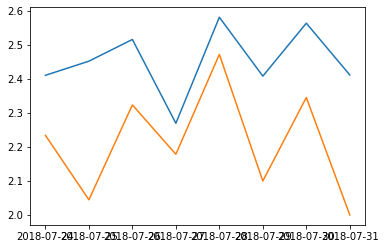

In [105]:
days = 7 
n=b+pd.Timedelta(days=days)
n1 = n + pd.Timedelta(days=1)
y_pred = sam_fit.forecast(steps = n1, exog=y_cols[["Label 1","Label 2","Label 3","Label 4","Label 5","Label 0","Label 7"]][b:n])
y_pred.index=y_pred.index.to_timestamp()
plt.plot(y_pred)
plt.plot(y_cols["Label 0"][b+pd.Timedelta(days=1):n1])
plt.show()